In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



# G1

In [1]:
import numpy as np

def objective_function(x):
    x = np.array(x).reshape(-1, 13)
    f = 5 * np.sum(x[:, :4], axis=1) - 5 * np.sum(x[:, :4] ** 2, axis=1) - np.sum(x[:, 4:], axis=1)
    return f

def constraint_function(x):
    x = np.array(x).reshape(-1, 13)
    g1 = 2 * x[:, 0] + 2 * x[:, 1] + x[:, 9] + x[:, 10] - 10
    g2 = 2 * x[:, 0] + 2 * x[:, 2] + x[:, 9] + x[:, 11] - 10
    g3 = 2 * x[:, 1] + 2 * x[:, 2] + x[:, 10] + x[:, 11] - 10
    g4 = -8 * x[:, 0] + x[:, 9]
    g5 = -8 * x[:, 1] + x[:, 10]
    g6 = -8 * x[:, 2] + x[:, 11]
    g7 = -2 * x[:, 3] - x[:, 4] + x[:, 9]
    g8 = -2 * x[:, 5] - x[:, 6] + x[:, 10]
    g9 = -2 * x[:, 7] - x[:, 8] + x[:, 11]

    return np.vstack((g1, g2, g3, g4, g5, g6, g7, g8, g9))  

def constraints(x):

    return np.all(constraint_function(x) <= 0, axis=0)

def objective_function_with_constraints(x):
    if not constraints(x):
        return 0
    else:
        return objective_function(x)


In [2]:
def get_real_pop(): # populacao com todas as particulas válidas 
  filename = '/content/populacao_teste.txt'

  # Lista para armazenar os indivíduos lidos
  real_population = []

  # Ler o arquivo de texto
  with open(filename, 'r') as file:
      for line in file:
          individual = list(map(float, line.strip().split()))
          real_population.append(individual)
  real_population  = np.array(real_population)
  return real_population

## pso 

In [5]:
import numpy as np
import pandas as pd

# Número de partículas
n_particles = 50

# Número de dimensões
n_dimensions = 13

# Limites inferiores e superiores para cada dimensão
lb = [0]*9 + [0]*3 + [0]
ub = [1]*9 + [100]*3 + [1]

# Parâmetros do PSO
c1 = 2
c2 = 2
w = 0.7
max_iter = 300
n_experiments = 30

# Armazenar resultados
results = []

pso_final = []
#PSO
for exp in range(n_experiments):
    # Inicializar enxame
    #particles = np.empty((n_particles, n_dimensions))
    #for i in range(n_particles):  ## gerar individuos válidos 
    #    while True:
    #        particle = np.random.uniform(low=lb, high=ub, size=n_dimensions)
    #        if objective_function_with_constraints(particle) != 0:
    #            particles[i] = particle
    #            break
    particles = get_real_pop()
    personal_best_scores = np.array([objective_function_with_constraints(p) for p in particles])

    velocities = np.zeros((n_particles, n_dimensions)) #inicializar velocidades com 0 
    personal_best_positions = particles.copy()

    # Inicializar o melhor global
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = min(personal_best_scores)

    # Loop principal
    for i in range(max_iter):
        print(f'------------------')
        print(f'experimento {exp+1} de {n_experiments}')
        print(f'iteração {i+1}')
        print(f'Global best score: {global_best_score}')
        for j in range(n_particles):
            # Atualizar velocidade
            velocities[j] = (w * velocities[j] +
                             c1 * np.random.rand() * (personal_best_positions[j] - particles[j]) +
                             c2 * np.random.rand() * (global_best_position - particles[j]))
            
            # Atualizar posição
            particles[j] += velocities[j]
            
            # Aplicar limites
            particles[j] = np.clip(particles[j], lb, ub)
            
            # Verificar restrições
            if not constraints(particles[j]):
              # A nova posição não satisfaz todas as restrições.
              # Trate isso de maneira adequada. Por exemplo:
                particles[j] = personal_best_positions[j].copy()
            # Atualizar o melhor pessoal
            score = objective_function_with_constraints(particles[j])
            if score < personal_best_scores[j]:
                personal_best_positions[j] = particles[j].copy()
                personal_best_scores[j] = score
                
                # Atualizar o melhor global
                if score < global_best_score:
                    global_best_position = particles[j].copy()
                    global_best_score = score

        # Armazenar resultados
        results.append({
            'Experiment': exp+1,
            'Iteration': i+1,
            'Best Fitness': np.min(global_best_score),
            'Best Particle': global_best_position,
            'Worst Fitness': np.max(personal_best_scores),
            'Average Fitness': np.mean(personal_best_scores),
            'Standard Deviation': np.std(personal_best_scores),
            'Median Fitness': np.median(personal_best_scores),
        })
    pso_final.append(np.min(global_best_score))
        

# Criar dataframe com os resultados
df = pd.DataFrame(results)

df.head(5)



Streaming output truncated to the last 5000 lines.
------------------
experimento 26 de 30
iteração 251
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 252
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 253
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 254
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 255
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 256
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 257
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 258
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 259
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 260
Global best score: [-5.45484696]
------------------
experimento 26 de 30
iteração 261
Global best score: [-5.45484696]
---

,Experiment,Iteration,Best Fitness,Best Particle,Worst Fitness,Average Fitness,Standard Deviation,Median Fitness
0,1,1,-5.321819,"[0.3684792326342894, 0.3054427640809304, 0.354...",1.008315,-2.891794,1.622041,-3.168379
1,1,2,-5.371512,"[0.3656597996955329, 0.30192274840505373, 0.35...",1.008315,-3.130467,1.724210,-3.312911
2,1,3,-5.371512,"[0.3656597996955329, 0.30192274840505373, 0.35...",1.008315,-3.130467,1.724210,-3.312911
3,1,4,-5.404175,"[0.3645903599794019, 0.29894263730190046, 0.35...",1.008315,-3.131321,1.725325,-3.312911
4,1,5,-5.404175,"[0.3645903599794019, 0.29894263730190046, 0.35...",1.008315,-3.131321,1.725325,-3.312911


In [ ]:
df.head(1000)

In [6]:
df_pso = df.sort_values('Best Fitness', ascending=True).reset_index()
best_PSO_individual = df_pso.loc[0, 'Best Particle']
fitness_best_PSO_individual = df_pso.loc[0, 'Best Fitness']
df_pso.head()

,index,Experiment,Iteration,Best Fitness,Best Particle,Worst Fitness,Average Fitness,Standard Deviation,Median Fitness
0,5377,18,278,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ...",0.406054,-3.519011,1.64118,-3.558518
1,5298,18,199,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ...",0.406054,-3.519011,1.64118,-3.558518
2,5299,18,200,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ...",0.406054,-3.519011,1.64118,-3.558518
3,5300,18,201,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ...",0.406054,-3.519011,1.64118,-3.558518
4,5301,18,202,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ...",0.406054,-3.519011,1.64118,-3.558518


In [ ]:
best_PSO_individual


## ga

In [7]:
import math
import random
import numpy as np
import pandas as pd

# Definindo os parâmetros do algoritmo genético
pop_size = 50
genes = 13
generations = 300
lb = [0]*9 + [0]*3 + [0]
ub = [1]*9 + [100]*3 + [1]
crossover_prob = 0.9
mutation_prob = 0.12
n_experiments = 30

results_ga = []
ga_final = []

for exp in range(n_experiments):
   # Inicialização da população
   # Inicializar enxame
   #particles = np.empty((n_particles, n_dimensions))
   #for i in range(n_particles):  ## gerar individuos válidos 
   #    while True:
   #        particle = np.random.uniform(low=lb, high=ub, size=n_dimensions)
   #        if objective_function_with_constraints(particle) != 0:
   #            particles[i] = particle
   #            break
   #population = particles
    population = get_real_pop()
    for gen in range(generations):
        # Avaliação da população
        fitness_values = [objective_function_with_constraints(ind) for ind in population]
        print(f'------------------')
        print(f'experimento {exp+1} de {n_experiments}')
        print(f'generation {gen+1}')
        print(f'Global best score: {min(fitness_values)}')
        print(f'Global worst score: {max(fitness_values)}')

        # Seleção por torneio
        parents = []
        while len(parents) < len(population):
            contenders_indices = random.sample(range(len(population)), 2)
            contenders = [population[i] for i in contenders_indices]
            contenders_fitness = [fitness_values[i] for i in contenders_indices]
            best_contender = contenders[contenders_fitness.index(min(contenders_fitness))]
            parents.append(best_contender)

        # Garantindo que o número de pais seja par
        if len(parents) % 2 != 0:
            parents.pop()



        # Assegurando que o melhor indivíduo sempre estará na próxima geração
        best_individual = population[np.argmin(fitness_values)]

        # Crossover Uniforme
        offspring = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i+1]
            child1 = parent1.copy()
            child2 = parent2.copy()
            for j in range(len(parent1)):
                if random.random() < crossover_prob:
                    child1[j] = parent2[j]
                    child2[j] = parent1[j]
            if constraints(child1) and constraints(child2):
                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])  
            
       # Crossover Blend
        alpha = 0.5
        for i in range(0, len(parents), 2):
            parent1 = np.array(parents[i])
            parent2 = np.array(parents[i+1])

            d = np.abs(parent1 - parent2)
            low = np.clip(np.minimum(parent1, parent2) - alpha * d, lb, ub)
            high = np.clip(np.maximum(parent1, parent2) + alpha * d, lb, ub)
            child1 = np.random.uniform(low, high)
            child2 = np.random.uniform(low, high)

            if constraints(child1) and constraints(child2):
                offspring.extend([child1.tolist(), child2.tolist()])
            else:
                offspring.extend([parent1.tolist(), parent2.tolist()])
            

            


        # Substituição na população
        population = offspring + [best_individual]

        # Manter o tamanho da população constante em 50 indivíduos
        fitness_values = [objective_function_with_constraints(ind) for ind in population]
        pop_with_fitness = list(zip(population, fitness_values))
        pop_with_fitness.sort(key=lambda x: x[1])
        population, fitness_values = map(list, zip(*pop_with_fitness[:50]))


        # Mutação
        best_index = np.argmin(fitness_values)  
        for i in range(len(population)):
            if i != best_index and np.random.rand() <= mutation_prob:
                mutation_point = np.random.randint(genes)
                new_value = np.random.uniform(lb[mutation_point], ub[mutation_point])
                temp_individual = population[i].copy()
                temp_individual[mutation_point] = new_value
                if constraints(temp_individual):
                    population[i] = temp_individual

        # Reavaliação da população após crossover e mutação
        fitness_values = [objective_function_with_constraints(ind) for ind in population]

        best_fitness = min(fitness_values)
        worst_fitness = max(fitness_values)
        mean_fitness = np.mean(fitness_values)
        std_dev_fitness = np.std(fitness_values)

        results_ga.append({
            'experimento':exp+1,
            'geração': gen,
            'melhor_fitness': best_fitness,
            'melhor_individuo': population[np.argmin(fitness_values)],
            'pior_fitness': worst_fitness,
            'media_fitness': mean_fitness,
            'desvio_padrao': std_dev_fitness,
            'numero_individuos': len(population),
        })

         
    ga_final.append(best_fitness)   

df_ga = pd.DataFrame(results_ga)
df_ga.head(5)




Streaming output truncated to the last 5000 lines.
------------------
experimento 27 de 30
generation 201
Global best score: [-12.66538258]
Global worst score: [-12.66448595]
------------------
experimento 27 de 30
generation 202
Global best score: [-12.66542575]
Global worst score: [-11.51219395]
------------------
experimento 27 de 30
generation 203
Global best score: [-12.66553512]
Global worst score: [-12.0084526]
------------------
experimento 27 de 30
generation 204
Global best score: [-12.66558173]
Global worst score: [-11.46156284]
------------------
experimento 27 de 30
generation 205
Global best score: [-12.66561163]
Global worst score: [-11.96538199]
------------------
experimento 27 de 30
generation 206
Global best score: [-12.66567561]
Global worst score: [-11.79125291]
------------------
experimento 27 de 30
generation 207
Global best score: [-12.66571817]
Global worst score: [-12.66557029]
------------------
experimento 27 de 30
generation 208
Global best score: [-12.665

,experimento,geração,melhor_fitness,melhor_individuo,pior_fitness,media_fitness,desvio_padrao,numero_individuos
0,1,0,[-5.876590792605695],"[0.2148786318055651, 0.9827814502287309, 0.813...",[-2.791570594683086],-4.239313,0.817151,50
1,1,1,[-7.592523021789189],"[0.8491324026318281, 0.9637334283384316, 0.993...",[-4.88360388652033],-5.482249,0.571625,50
2,1,2,[-8.053071959380741],"[0.8491324026318281, 0.3083473844405582, 0.993...",[-5.1435685549149675],-6.283373,0.705678,50
3,1,3,[-9.03444018547235],"[0.8491324026318281, 0.9654265160896255, 0.993...",[-6.284263762269983],-7.346623,0.659449,50
4,1,4,[-9.40012679440492],"[0.8491324026318281, 0.9783412538681558, 0.993...",[-7.581000848378698],-8.399494,0.456340,50


In [ ]:
df_ga.head(1000)

In [14]:
df_ga = df_ga.sort_values('melhor_fitness', ascending=True).reset_index()
best_ga_individual = df_ga.loc[0, 'melhor_individuo']
fitness_best_ga_individual = df_ga.loc[0, 'melhor_fitness']
df_ga.head()

,index,experimento,geração,melhor_fitness,melhor_individuo,pior_fitness,media_fitness,desvio_padrao,numero_individuos
0,7798,26,298,[-14.841249953236469],"[0.9997316064618322, 0.9962394792642877, 0.999...",[-14.841249953233127],-14.841250,7.519513e-13,50
1,7799,26,299,[-14.841249953236469],"[0.9997316064618322, 0.9962394792642877, 0.999...",[-14.84124995323409],-14.841250,6.498094e-13,50
2,7797,26,297,[-14.841249953234401],"[0.99973160646192, 0.9962394792640222, 0.99999...",[-13.598191554395802],-14.792898,2.089628e-01,50
3,7796,26,296,[-14.841249953234069],"[0.9997316064618318, 0.9962394792640391, 0.999...",[-13.591489523238065],-14.805680,1.817814e-01,50
4,7795,26,295,[-14.841249953233564],"[0.9997316064619098, 0.9962394792639924, 0.999...",[-13.645398059309931],-14.814130,1.684600e-01,50


## de

In [8]:
# Definindo os parâmetros do de
pop_size = 50
genes = 13
generations = 300
lb = [0]*9 + [0]*3 + [0]
ub = [1]*9 + [100]*3 + [1]
crossover_prob = 0.6
mutation_prob = 0.1
F = 0.8  # Fator de escala para a mutação

results_de = []
de_final = []

for exp in range(30):
   # Inicialização da população
   # Inicializar enxame
   #particles = np.empty((n_particles, n_dimensions))
   #for i in range(n_particles):  ## gerar individuos válidos 
   #    while True:
   #        particle = np.random.uniform(low=lb, high=ub, size=n_dimensions)
   #        if objective_function_with_constraints(particle) != 0:
   #            particles[i] = particle
   #            break
   #population = particles
    population = get_real_pop()

    # Loop das gerações
    for gen in range(generations):
        # Avaliação da população
        fitness_values = [objective_function_with_constraints(ind) for ind in population]

        # Salvar o melhor indivíduo para elitismo
        best_index = np.argmin(fitness_values)
        best_individual = population[best_index].copy()

        # Evolução Diferencial
        new_population = population.copy()
        for i in range(pop_size):
            indices = [idx for idx in range(pop_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = np.clip(a + F * (b - c), lb, ub)  # Mutação
            cross_points = np.random.rand(genes) < crossover_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, genes)] = True
            trial = np.where(cross_points, mutant, population[i])  # Crossover
            if constraints(trial):
                if objective_function_with_constraints(trial) < fitness_values[i]:  # Aceitação
                    new_population[i] = trial
            else:
                new_population[i] = population[i]

        population = new_population

        # Elitismo: garantir que o melhor indivíduo esteja na nova população
        new_fitness_values = [objective_function_with_constraints(ind) for ind in population]
        worst_index = np.argmax(new_fitness_values)
        if new_fitness_values[worst_index] > fitness_values[best_index]:
            population[worst_index] = best_individual

        # Estatísticas da geração
        fitness_values = [objective_function_with_constraints(ind) for ind in population]
        best_fitness = min(fitness_values)
        worst_fitness = max(fitness_values)
        mean_fitness = np.mean(fitness_values)
        std_dev_fitness = np.std(fitness_values)

        results_de.append({
            'experimento': exp+1,
            'geracao': gen,
            'melhor_fitness': best_fitness,
            'melhor_particula': population[np.argmin(fitness_values)],
            'pior_fitness': worst_fitness,
            'media_dos_fitness': mean_fitness,
            'desvio_padrao': std_dev_fitness,
            'n_de_individuos': len(population),
        })
        print(f'Experimento {exp+1}, Geração {gen+1}')
        print(f'Melhor partícula: {population[np.argmin(fitness_values)]}, Fitness: {best_fitness}')
        print(f'Pior partícula: {population[np.argmax(fitness_values)]}, Fitness: {worst_fitness}')
        print('---'*20)
    de_final.append(best_fitness)

df_de = pd.DataFrame(results_de)
df_de.head(5)


Streaming output truncated to the last 5000 lines.
Pior partícula: [1.         1.         1.         1.         1.         1.
 1.         1.         0.99999807 2.99995732 2.9999931  2.99995685
 1.        ], Fitness: [-14.99990534]
------------------------------------------------------------
Experimento 28, Geração 157
Melhor partícula: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         2.99999986 2.99998808 2.99999471
 1.        ], Fitness: [-14.99998265]
Pior partícula: [1.         1.         0.99999599 1.         1.         1.
 1.         1.         0.99999807 2.99996499 2.99999128 2.9999766
 1.        ], Fitness: [-14.99991091]
------------------------------------------------------------
Experimento 28, Geração 158
Melhor partícula: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         2.99999641 2.99999086 2.99999973
 1.        ], Fitness: [-14.999987]
Pior partícula: [1.         1.         1.         

,experimento,geracao,melhor_fitness,melhor_particula,pior_fitness,media_dos_fitness,desvio_padrao,n_de_individuos
0,1,0,[-6.130050066598535],"[0.8573248473440626, 0.962887746279746, 0.8278...",[0.3828012127046163],-2.698184,1.552129,50
1,1,1,[-6.130050066598535],"[0.8573248473440626, 0.962887746279746, 0.8278...",[-0.3982959642970405],-3.023021,1.522540,50
2,1,2,[-6.95481933447188],"[0.7474790875811407, 1.0, 0.8410521377365304, ...",[-0.9212457556376821],-3.540210,1.612612,50
3,1,3,[-7.789612997029918],"[0.32491744445474896, 0.8537687231814971, 1.0,...",[-0.9401336009268997],-3.950944,1.624992,50
4,1,4,[-9.171038173476623],"[1.0, 1.0, 1.0, 1.0, 0.873244239500444, 0.8511...",[-1.0711483378134048],-4.345950,1.700693,50


In [9]:
df_de.head(1000)

,experimento,geracao,melhor_fitness,melhor_particula,pior_fitness,media_dos_fitness,desvio_padrao,n_de_individuos
0,1,0,[-6.130050066598535],"[0.8573248473440626, 0.962887746279746, 0.8278...",[0.3828012127046163],-2.698184,1.552129,50
1,1,1,[-6.130050066598535],"[0.8573248473440626, 0.962887746279746, 0.8278...",[-0.3982959642970405],-3.023021,1.522540,50
2,1,2,[-6.95481933447188],"[0.7474790875811407, 1.0, 0.8410521377365304, ...",[-0.9212457556376821],-3.540210,1.612612,50
3,1,3,[-7.789612997029918],"[0.32491744445474896, 0.8537687231814971, 1.0,...",[-0.9401336009268997],-3.950944,1.624992,50
4,1,4,[-9.171038173476623],"[1.0, 1.0, 1.0, 1.0, 0.873244239500444, 0.8511...",[-1.0711483378134048],-4.345950,1.700693,50
...,...,...,...,...,...,...,...,...
995,4,95,[-14.996205971305393],"[1.0, 0.9999062025132007, 1.0, 1.0, 1.0, 0.999...",[-14.975480432996477],-14.986080,0.005895,50
996,4,96,[-14.996205971305393],"[1.0, 0.9999062025132007, 1.0, 1.0, 1.0, 0.999...",[-14.97627235533997],-14.987203,0.005384,50
997,4,97,[-14.996674914749548],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999974481602854, ...",[-14.976930942901996],-14.988577,0.004514,50
998,4,98,[-14.997209952751756],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999336521674189, ...",[-14.980692471537289],-14.989742,0.004194,50


In [10]:
df_de = df_de.sort_values('melhor_fitness', ascending=True).reset_index()
best_de_individual = df_de.loc[0, 'melhor_particula']
fitness_best_de_individual = df_de.loc[0, 'melhor_fitness']
df_de.head()

,index,experimento,geracao,melhor_fitness,melhor_particula,pior_fitness,media_dos_fitness,desvio_padrao,n_de_individuos
0,599,2,299,[-14.999999999999998],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.999999999999973],-15.0,6.943715e-15,50
1,597,2,297,[-14.999999999999998],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.999999999999964],-15.0,8.407255e-15,50
2,598,2,298,[-14.999999999999998],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.99999999999997],-15.0,7.341320e-15,50
3,596,2,296,[-14.999999999999998],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.999999999999961],-15.0,8.938447e-15,50
4,591,2,291,[-14.999999999999996],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.999999999999927],-15.0,1.709184e-14,50


## ES

#parametros globais + EE-CMA

In [11]:
import numpy as np
from scipy.linalg import sqrtm

# Definindo os parâmetros da evolução estratégica
pop_size = 50
genes = 13
generations = 300
lb = [0]*9 + [0]*3 + [0]
ub = [1]*9 + [100]*3 + [1]
sigma = 0.1  # Desvio padrão para a mutação
tau = 1/np.sqrt(2*genes)  # Parâmetro de autoadaptação

results_es = []
es_g_final = []



# Loop dos experimentos
for exp in range(30):
  # Inicialização da população
  # Inicializar enxame
  #particles = np.empty((n_particles, n_dimensions))
  #for i in range(n_particles):  ## gerar individuos válidos 
  #    while True:
  #        particle = np.random.uniform(low=lb, high=ub, size=n_dimensions)
  #        if objective_function_with_constraints(particle) != 0:
  #            particles[i] = particle
  #            break
  #population = particles
  population = get_real_pop()
  sigmas = sigma * np.ones((pop_size, genes, genes))
  # Loop das gerações
  # Loop das gerações
  for gen in range(generations):
      # Avaliação da população
      fitness_values = [objective_function_with_constraints(ind) for ind in population]

      # Elitismo: guardar o melhor indivíduo
      best_index = np.argmin(fitness_values)
      best_individual = population[best_index].copy()

      # Estratégia Evolutiva
      for i in range(pop_size):
          # Seleção de pais aleatórios
          parent_indices = np.random.choice(pop_size, 2, replace=False)
          parents = population[parent_indices]

          # CMA-ES
          mean = np.mean(parents, axis=0)
          cov = np.cov(parents.T)
          child = np.random.multivariate_normal(mean, cov)
          child = np.clip(child, lb, ub)

          # Adição de mutação
          child += sigma * np.random.randn(genes)
          child = np.clip(child, lb, ub)

          # Seleção (mu, sigma)
           # Seleção (mu, sigma)
          if constraints(child) and objective_function_with_constraints(child) < fitness_values[i]:
              population[i] = child

      # Elitismo: substituir o pior indivíduo pelo melhor da geração anterior, se necessário
      fitness_values = [objective_function_with_constraints(ind) for ind in population]
      worst_index = np.argmax(fitness_values)
      if fitness_values[worst_index] > objective_function_with_constraints(best_individual):
          population[worst_index] = best_individual

      # Estatísticas da geração
      best_fitness = min(fitness_values)
      worst_fitness = max(fitness_values)
      mean_fitness = np.mean(fitness_values)
      std_dev_fitness = np.std(fitness_values)

      results_es.append({
          'experimento': exp+1,
          'geracao': gen,
          'melhor_fitness': best_fitness,
          'melhor_particula': population[np.argmin(fitness_values)],
          'pior_fitness': worst_fitness,
          'media_dos_fitness': mean_fitness,
          'desvio_padrao': std_dev_fitness,
          'n_de_individuos': len(population),
      })

      # Imprime as melhores e piores partículas
      print(f'Experimento {exp+1}, Geração {gen+1}')
      print(f'Melhor partícula: {population[np.argmin(fitness_values)]}, Fitness: {best_fitness}')
      print(f'Pior partícula: {population[np.argmax(fitness_values)]}, Fitness: {worst_fitness}')
      print('---'*20)
      
  es_g_final.append(best_fitness)

df_g_es = pd.DataFrame(results_es)
df_g_es.head(5)





Streaming output truncated to the last 5000 lines.
Experimento 28, Geração 276
Melhor partícula: [1.         1.         1.         1.         0.96891459 1.
 1.         0.99688021 0.97922087 2.94995757 2.9654232  2.95180526
 1.        ], Fitness: [-14.8122017]
Pior partícula: [1.         1.         1.         1.         0.96891459 1.
 1.         0.99688021 0.97922087 2.94995757 2.9654232  2.95180526
 1.        ], Fitness: [-14.8122017]
------------------------------------------------------------
Experimento 28, Geração 277
Melhor partícula: [1.         1.         1.         1.         0.96891459 1.
 1.         0.99688021 0.97922087 2.94995757 2.9654232  2.95180526
 1.        ], Fitness: [-14.8122017]
Pior partícula: [1.         1.         1.         1.         0.96891459 1.
 1.         0.99688021 0.97922087 2.94995757 2.9654232  2.95180526
 1.        ], Fitness: [-14.8122017]
------------------------------------------------------------
Experimento 28, Geração 278
Melhor partícula: [1.  

,experimento,geracao,melhor_fitness,melhor_particula,pior_fitness,media_dos_fitness,desvio_padrao,n_de_individuos
0,1,0,[-5.972162378242398],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9942597190469915, ...",[-0.3982959642970405],-3.014490,1.314218,50
1,1,1,[-5.972162378242398],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9942597190469915, ...",[-0.9212457556376821],-3.461666,1.219256,50
2,1,2,[-5.972162378242398],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9942597190469915, ...",[-1.9537300620750981],-3.928342,1.008475,50
3,1,3,[-5.972162378242398],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9942597190469915, ...",[-2.6644788620261712],-4.389132,0.923410,50
4,1,4,[-6.9607350428106045],"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9942597190469915, ...",[-2.7191041763264785],-4.845877,0.911051,50


In [ ]:
df_g_es.head(1000)

In [12]:
df_g_es = df_g_es.sort_values('melhor_fitness', ascending=True).reset_index()
best_g_es_individual = df_g_es.loc[0, 'melhor_particula']
fitness_best_g_es_individual = df_g_es.loc[0, 'melhor_fitness']
df_g_es.head()

,index,experimento,geracao,melhor_fitness,melhor_particula,pior_fitness,media_dos_fitness,desvio_padrao,n_de_individuos
0,8597,29,197,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.891436210536297],-14.891436,0.0,50
1,8651,29,251,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.891436210536297],-14.891436,0.0,50
2,8652,29,252,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.891436210536297],-14.891436,0.0,50
3,8653,29,253,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.891436210536297],-14.891436,0.0,50
4,8654,29,254,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[-14.891436210536297],-14.891436,0.0,50


## resultados obtidos

In [15]:
resultados_G1 = pd.DataFrame({
    'EVO. Alg.':['PSO','GA','DE','ES'],
    'Best Fitness':[fitness_best_PSO_individual,fitness_best_ga_individual,fitness_best_de_individual,fitness_best_g_es_individual],
    'Best Particle EA':[best_PSO_individual,best_ga_individual,best_de_individual,best_g_es_individual]})

resultados_G1 = resultados_G1.sort_values('Best Fitness',ascending=True).reset_index()
resultados_G1.head()

,index,EVO. Alg.,Best Fitness,Best Particle EA
0,2,DE,[-14.999999999999998],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,3,ES,[-14.891436210536297],"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,1,GA,[-14.841249953236469],"[0.9997316064618322, 0.9962394792642877, 0.999..."
3,0,PSO,-7.597043,"[0.2660263826997796, 1.0, 0.8253650147969184, ..."


AttributeError: ignored

In [18]:
pso_final

[-5.430563742880529,
 -5.711424934951032,
 -5.385618585480315,
 -5.998781588612846,
 -5.3846706360642855,
 -5.62697997169711,
 -5.46327365307161,
 -5.751266996476018,
 -5.339385265974374,
 -5.7665564072999,
 -5.58300026509928,
 -6.246748580722205,
 -5.449732991903529,
 -5.528991452462517,
 -5.616896632771621,
 -5.51747817047026,
 -7.300102435843435,
 -7.597042508637292,
 -5.421471208437536,
 -6.028814369621865,
 -5.4127261949404595,
 -5.620447149904386,
 -6.241302543699467,
 -5.827849248641522,
 -5.855023869750444,
 -5.454846962341602,
 -5.461525163335798,
 -6.170113383377808,
 -5.6146144502648845,
 -5.49642997648801]

In [20]:
ga_final

[array([-13.66974182]),
 array([-14.15556821]),
 array([-13.51356274]),
 array([-14.34010803]),
 array([-13.59173143]),
 array([-14.71732279]),
 array([-14.46438866]),
 array([-13.01010725]),
 array([-13.47868213]),
 array([-13.36836754]),
 array([-14.67205425]),
 array([-12.89980204]),
 array([-14.41608846]),
 array([-13.45034176]),
 array([-13.3102169]),
 array([-14.0170893]),
 array([-13.47866728]),
 array([-14.27237878]),
 array([-14.50395211]),
 array([-14.45861423]),
 array([-12.84034481]),
 array([-14.03912969]),
 array([-14.56248401]),
 array([-14.02371925]),
 array([-13.28113524]),
 array([-14.84124995]),
 array([-13.20249346]),
 array([-12.96335772]),
 array([-13.49117679]),
 array([-13.59524494])]

In [23]:
es_g_final

[array([-14.72155427]),
 array([-12.68275901]),
 array([-14.85654025]),
 array([-12.74106277]),
 array([-14.81196381]),
 array([-14.61263029]),
 array([-14.77192492]),
 array([-12.77443721]),
 array([-14.51834818]),
 array([-12.71078555]),
 array([-14.83736331]),
 array([-14.61729826]),
 array([-14.69746782]),
 array([-12.72021349]),
 array([-14.8542226]),
 array([-14.69360832]),
 array([-14.86495229]),
 array([-14.70600975]),
 array([-12.82924938]),
 array([-14.79348739]),
 array([-14.77827058]),
 array([-14.75344224]),
 array([-14.66529433]),
 array([-14.72118705]),
 array([-12.56306938]),
 array([-12.7556233]),
 array([-14.8179993]),
 array([-14.8122017]),
 array([-14.89143621]),
 array([-12.89562757])]

In [24]:
de_final

[array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.]),
 array([-15.])]

<ipython-input-25-997b9fdadb41>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  de_final_flat = [np.asscalar(x) for x in de_final]
<ipython-input-25-997b9fdadb41>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  es_g_final_flat = [np.asscalar(x) for x in es_g_final]
<ipython-input-25-997b9fdadb41>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ga_final_flat = [np.asscalar(x) for x in ga_final]


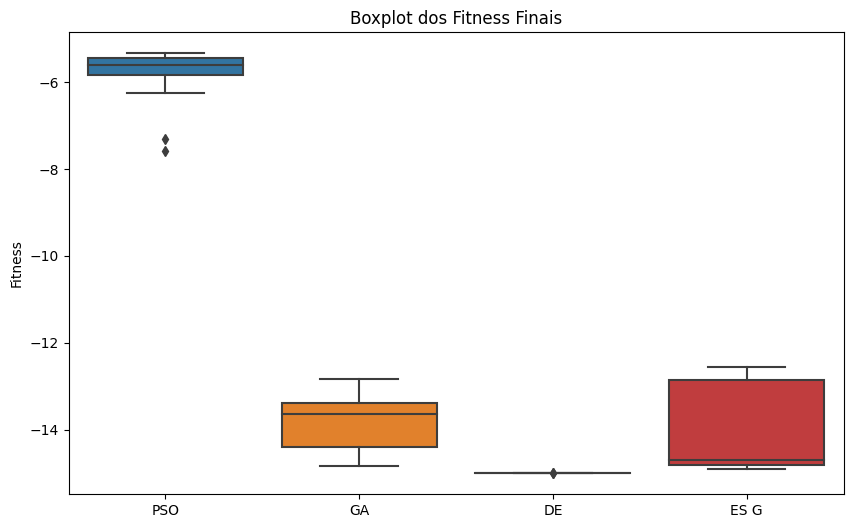

In [25]:
import numpy as np

# Aplanando os dados
de_final_flat = [np.asscalar(x) for x in de_final]
es_g_final_flat = [np.asscalar(x) for x in es_g_final]
ga_final_flat = [np.asscalar(x) for x in ga_final]

# Agora, todos os seus dados são listas simples de números
data = pd.DataFrame({
    'PSO': pso_final,
    'GA': ga_final_flat,
    'DE': de_final_flat,
    'ES G': es_g_final_flat,
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot dos Fitness Finais')
plt.ylabel('Fitness')
plt.show()


